In [35]:
## Importing Important Libraraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Part 1: Dataset uploading the Feature Engineernig**

In [36]:
## Importing the Bank Customer Datsets
df = pd.read_csv('BankCustomers.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
## Converting the dataset into dependent and independent variables

x = df.iloc[:, 3:13]  #since first 3 columns are not important, so we do not consider that features.
y = df['Exited']

In [38]:
## Converting Categorical feature into dummy variables
countries = pd.get_dummies(x['Geography'], drop_first=True)
sex  =pd.get_dummies(x['Gender'], drop_first=True)

In [39]:
## Concatenate the remaining dummies columns
x = pd.concat([x, countries, sex], axis=1) 

In [40]:
## Drop the Geography and Gender columns 
x = x.drop(['Geography', 'Gender'], axis=1)

In [41]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [42]:
## Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [43]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(7500, 11) (2500, 11) (7500,) (2500,)


In [44]:
## Feature scaling with Standard Scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# **Part 2: ANN Model Building and Compilation**

In [45]:
## Importing the Libraries related to keras

import keras
from keras.models import Sequential
from keras.layers import Dense

In [46]:
## ANN Model Building

# Initialising the ANN
model = Sequential()

## adding the input layer and first Hidden Layer
model.add(Dense(activation='relu',units=32, input_dim=11, kernel_initializer='uniform' ))

## adding the 2nd Hidden layer
model.add(Dense(activation='relu', units=64, kernel_initializer='uniform'))

## adding the 3rd Hidden layer
model.add(Dense(activation='relu', units=32, kernel_initializer='uniform'))

## adding the output layer
model.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))


In [47]:
## Compiling the ANN Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                384       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [49]:
#Fitting the ANN Model to the training set
model_history = model.fit(x_train, y_train, batch_size=12, epochs=55, validation_split=0.25)

Epoch 1/55
469/469 [==============================] - 2s 3ms/step - loss: 0.4667 - accuracy: 0.7922 - val_loss: 0.4326 - val_accuracy: 0.7936
Epoch 2/55
469/469 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.8073 - val_loss: 0.4158 - val_accuracy: 0.8363
Epoch 3/55
469/469 [==============================] - 1s 2ms/step - loss: 0.3887 - accuracy: 0.8434 - val_loss: 0.3695 - val_accuracy: 0.8549
Epoch 4/55
469/469 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8590 - val_loss: 0.3612 - val_accuracy: 0.8528
Epoch 5/55
469/469 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8624 - val_loss: 0.3541 - val_accuracy: 0.8555
Epoch 6/55
469/469 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8631 - val_loss: 0.3590 - val_accuracy: 0.8533
Epoch 7/55
469/469 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8613 - val_loss: 0.3463 - val_accuracy: 0.8592
Epoch 

# **Part 3: ANN Model Performance**

In [60]:
##Predicting the Test set result
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)


In [61]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[1924,   79],
       [ 279,  218]])

Text(83.40000000000006, 0.5, 'Actual')

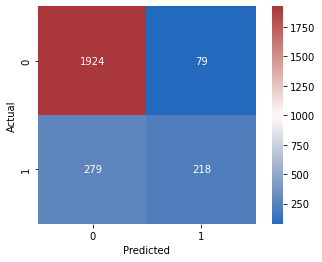

In [64]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap='vlag')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [52]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8568

In [53]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.96      0.91      2003\n           1       0.73      0.44      0.55       497\n\n    accuracy                           0.86      2500\n   macro avg       0.80      0.70      0.73      2500\nweighted avg       0.85      0.86      0.84      2500\n'

# **Part 4: Graphical Representation of Model Accuracy and Loss**

Text(0.5, 1.0, 'Accuracy VS Epochs')

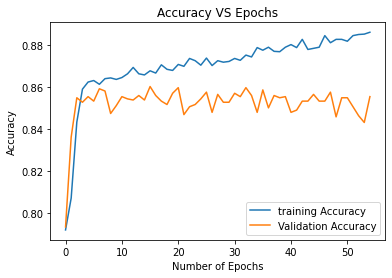

In [54]:
plt.plot(model_history.history["accuracy"], label="training Accuracy")
plt.plot(model_history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy VS Epochs")


Text(0.5, 1.0, 'Loss VS Epochs')

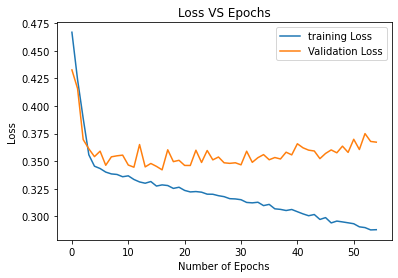

In [55]:
plt.plot(model_history.history["loss"], label="training Loss")
plt.plot(model_history.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss VS Epochs")